In [1]:
import networkx as nx
import matplotlib.pyplot as plt

1.	Crear la clase grafo (en Python) para el ejercicio 2. (valor = 1 punto)

In [2]:
class Grafo:
    def __init__(self, G):
        self.G = G
        
    def cargoGraph(self):
        self.G.add_weighted_edges_from([('a', 'b', 5),
                                        ('a', 'd', 6),
                                        ('b', 'c', 5),
                                        ('b', 'e', 6),
                                        ('b', 'g', 7),
                                        ('c', 'g', 2),
                                        ('d', 'f', 5),
                                        ('d', 'g', 9),
                                        ('e', 'a', 3),
                                        ('e', 'd', 2),
                                        ('f', 'g', 9)]) 
        return self.G

    def emitoGraph(self, pos):
        nx.draw_networkx_nodes(self.G, pos, node_color='violet', node_size=600)
        nx.draw_networkx_labels(self.G, pos, font_size=10, font_family='sans-serif')
        nx.draw_networkx_edges(self.G, pos, edge_color='grey', width=2, arrowstyle= '<|-|>', arrowsize = 10)
        labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.axis('off')
        plt.show()

2.	Dada la siguiente matriz que determina nodos, pesos y conexiones, resolver usando networkx:

<table>
	<thead>
	<tr>
		<th></th>
		<th>A</th>
		<th>B</th>
		<th>C</th>
		<th>D</th>
		<th>E</th>
		<th>F</th>
		<th>G</th>
	</tr>
	</thead>
	<tbody>
	<tr>
		<td>A</td>
		<td></td>
		<td>5</td>
		<td></td>
		<td>6</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>B</td>
		<td></td>
		<td></td>
		<td>5</td>
		<td></td>
		<td>6</td>
		<td></td>
		<td>7</td>
	</tr>
	<tr>
		<td>C</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>2</td>
	</tr>
	<tr>
        <td>D</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>5</td>
		<td>9</td>
	</tr>
	<tr>
        <td>E</td>
		<td>3</td>
		<td></td>
		<td></td>
		<td>2</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
        <td>F</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>9</td>
	</tr>
	<tbody>
</table>

None


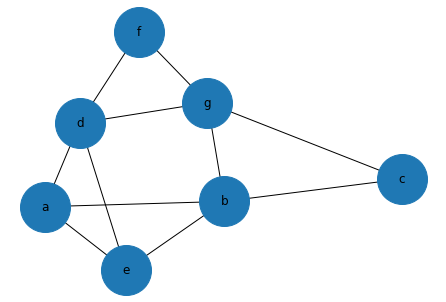

In [3]:
# a.	Construir los nodos, enlaces y pesos y graficar. 
grafo1 = Grafo(nx.Graph()) #Creo un objeto de la clase para definir el primer grafo
G = grafo1.cargoGraph() #Carga del grafo 
x = nx.draw(G, with_labels=True, node_size=2500, font_size=12)
print(x)

In [4]:
# b.	Emitir los vecinos de ‘b’ 
list(G.neighbors('b'))

['a', 'c', 'e', 'g']

In [5]:
# c.	Emitir cantidad de aristas de cada nodo
G.degree()

DegreeView({'a': 3, 'b': 4, 'd': 4, 'c': 2, 'e': 3, 'g': 4, 'f': 2})

In [6]:
# d.	Convertir en diccionario la salida anterior 
dict(G.degree())

{'a': 3, 'b': 4, 'd': 4, 'c': 2, 'e': 3, 'g': 4, 'f': 2}

In [7]:
# e.	Crear la matriz de adyacencia y emitirla 
M = nx.adjacency_matrix(G)
M.todense()

matrix([[0, 5, 6, 0, 3, 0, 0],
        [5, 0, 0, 5, 6, 7, 0],
        [6, 0, 0, 0, 2, 9, 5],
        [0, 5, 0, 0, 0, 2, 0],
        [3, 6, 2, 0, 0, 0, 0],
        [0, 7, 9, 2, 0, 0, 9],
        [0, 0, 5, 0, 0, 9, 0]], dtype=int32)

In [8]:
# f.	Crear la matriz de incidencia y emitirla 
I =  nx.incidence_matrix(G)
I.todense()


matrix([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [9]:
# g.	Emitir la longitud desde ‘a’ hasta el objetivo
nx.single_source_shortest_path_length(G, 'a')

{'a': 0, 'd': 1, 'b': 1, 'e': 1, 'c': 2, 'g': 2, 'f': 2}

In [10]:
# h.	Emitir el promedio de la ruta más corta usando el método de floyd-warshall
nx.algorithms.average_shortest_path_length(G, method="floyd-warshall")

1.4761904761904763

In [11]:
# i.	Emitir la ruta ponderada más corta entre ‘a’ y ‘g’ usando el algoritmo de Dijkstra 
nx.algorithms.dijkstra_path(G, 'a', 'g')

['a', 'b', 'g']

In [12]:
# j.	Emitir la longitud de la ruta ponderada entre ‘a’ y ‘g’ 
nx.dijkstra_path_length(G,'a','g')

12

In [13]:
# k.	Emitir la longitud de la ruta desde el nodo ‘c'
nx.single_source_dijkstra_path_length(G,'c')

{'c': 0, 'g': 2, 'b': 5, 'a': 10, 'd': 11, 'f': 11, 'e': 11}

In [14]:
# l.	Emita el radio del grafo 
nx.single_source_dijkstra_path_length(G,'c')

{'c': 0, 'g': 2, 'b': 5, 'a': 10, 'd': 11, 'f': 11, 'e': 11}

In [25]:
# m.	Emita el diámetro del grafo 
nx.diameter(G)          

2

In [26]:
# n.	Emita la excentricidad  
nx.eccentricity(G)    

{'a': 2, 'b': 2, 'd': 2, 'c': 2, 'e': 2, 'g': 2, 'f': 2}

In [27]:
# o.	Emita el centro del grafo 
nx.center(G)              

['a', 'b', 'd', 'c', 'e', 'g', 'f']

In [28]:
# p.	Emita la periferia del grafo 
nx.periphery(G)            

['a', 'b', 'd', 'c', 'e', 'g', 'f']

In [75]:
# q.	Emita la densidad. 
nx.density(G) 

0.5238095238095238

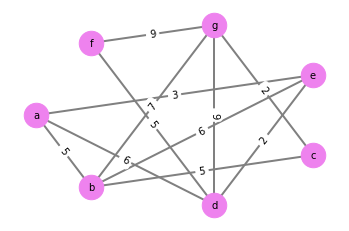

In [76]:
# r.	Dibujar el grafo y emitir con matplotlib
#Gráfico:
pos = nx.shell_layout(G)
grafo1.emitoGraph(pos)

In [81]:
# s.	Convertir en grafo dirigido 
H = G.to_directed()
grafo2 = Grafo(H)
H = grafo2.cargoGraph()

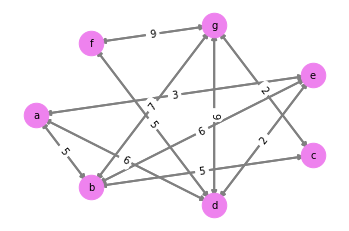

In [82]:
# t.	Dibujar el nuevo grafo y emitir con matplotlib
pos = nx.shell_layout(H)
grafo2.emitoGraph(pos)

3.	Dadas las siguientes líneas de texto:

        1,Ciudad Autónoma de Buenos Aires (CABA),AR-C
        
        2,Buenos Aires,AR-B
        
        3,Catamarca,AR-K
        
        4,Córdoba,AR-X
        
        5,Corrientes,AR-W
        
        6,Entre Ríos,AR-E
        
        7,Jujuy,AR-Y

Construir el programa y hallar la expresión regular para extraer en una lista las provincia o ciudad (CABA) y la última letra de la cadena, sin el guión: 

Ej: [Ciudad Autónoma de Buenos Aires (CABA),C, Buenos Aires,B, ….. ]


In [1]:
import re 

texto = """
1,Ciudad Autónoma de Buenos Aires (CABA),AR-C
2,Buenos Aires,AR-B
3,Catamarca,AR-K
4,Córdoba,AR-X
5,Corrientes,AR-W
6,Entre Ríos,AR-E
7,Jujuy,AR-Y
"""
a_buscar = r'(?<=,)[^\n]+(?=,)|(?<=-)[A-Z]+(?=\n)'

x = re.findall(a_buscar, texto) 
print(x)

['Ciudad Autónoma de Buenos Aires (CABA)', 'C', 'Buenos Aires', 'B', 'Catamarca', 'K', 'Córdoba', 'X', 'Corrientes', 'W', 'Entre Ríos', 'E', 'Jujuy', 'Y']
